Pengolahan Sinyal Digital - Kuliah 6
Penyaringan sinyal, filter BIH dan FIR

Filter IIR
Filter IIR adalah jenis filter digital yang memiliki respon impuls yang tidak terbatas dalam waktu. Ini berarti bahwa output dari filter IIR bergantung tidak hanya pada input saat ini tetapi juga pada input dan output sebelumnya. Filter IIR sering kali digunakan karena mereka dapat mencapai karakteristik filter yang diinginkan dengan urutan yang lebih rendah dibandingkan dengan filter FIR.

Sifat-sifat IIR:
Respon tak hingga: Karena memiliki umpan balik, respon impuls dari filter IIR tidak terbatas dalam waktu.
- Efisiensi: Untuk mencapai spesifikasi filter yang sama, filter IIR umumnya memerlukan urutan yang lebih rendah dibandingkan filter FIR.
- Stabilitas: Filter IIR bisa menjadi tidak stabil jika tidak dirancang dengan hati-hati. Stabilitas ditentukan oleh lokasi pole pada bidang z.

Perancangan Filter IIR
Filter IIR sering kali dirancang menggunakan metode transformasi analog ke digital seperti metode bilinear transform atau transformasi z langsung. Beberapa jenis filter analog yang sering digunakan adalah Butterworth, Chebyshev, dan Elliptic.

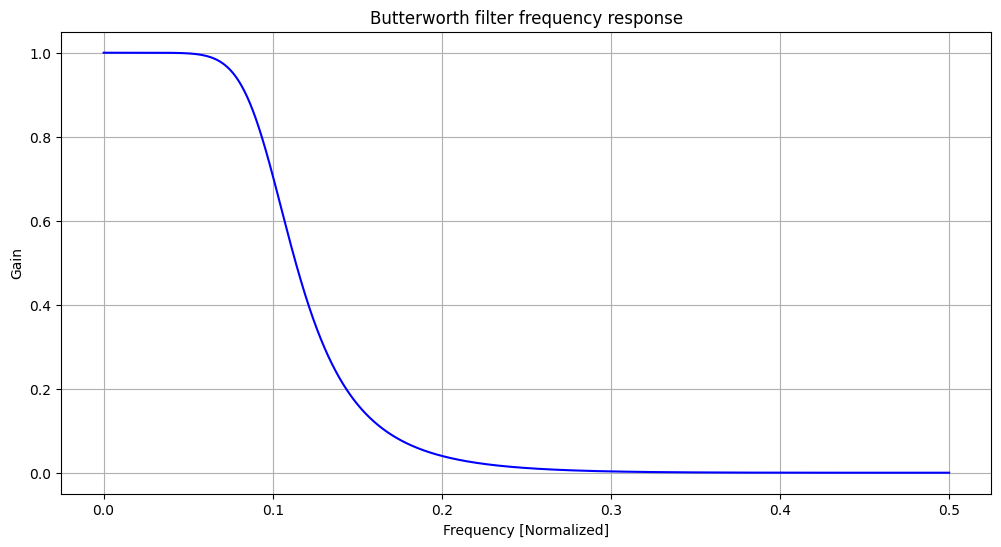

In [3]:
import numpy as np
from scipy.signal import iirfilter, freqz
import matplotlib.pyplot as plt

# Parameter filter
order = 4
cutoff = 0.2  # Cutoff frequency as a fraction of the Nyquist rate

# Desain filter IIR menggunakan Butterworth
b, a = iirfilter(order, cutoff, btype='low', analog=False, ftype='butter')

# Frekuensi respon dari filter
w, h = freqz(b, a, worN=8000)

# Plot respon frekuensi
plt.figure(figsize=(12, 6))
plt.plot(0.5 * w / np.pi, np.abs(h), 'b')
plt.title("Butterworth filter frequency response")
plt.xlabel('Frequency [Normalized]')
plt.ylabel('Gain')
plt.grid()
plt.show()


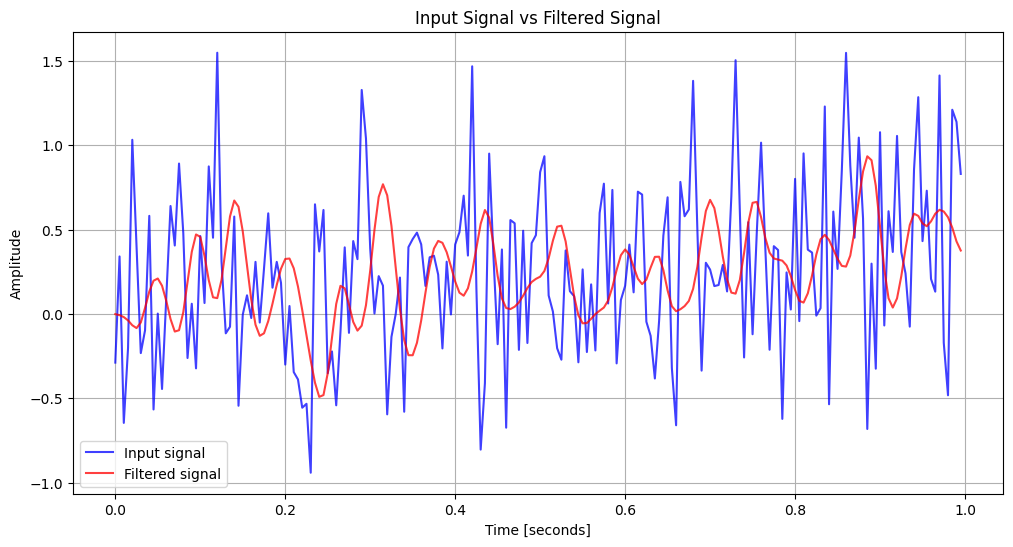

In [4]:
from scipy.signal import lfilter

# Membuat sinyal contoh (sine wave yang tercampur noise)
t = np.linspace(0, 1, 200, endpoint=False)
x = np.sin(2 * np.pi * 0.1 * t) + 0.5 * np.random.randn(t.shape[0])

# Aplikasikan filter pada sinyal
y = lfilter(b, a, x)

# Plot sinyal asli dan sinyal hasil filter
plt.figure(figsize=(12, 6))
plt.plot(t, x, 'b', alpha=0.75, label='Input signal')
plt.plot(t, y, 'r', alpha=0.75, label='Filtered signal')
plt.legend()
plt.title("Input Signal vs Filtered Signal")
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


Sinyal dan filter
Pada bagian sebelumnya, kami telah memperkenalkan konsep sinyal, spektrum, dan bentuk-Z. Dalam proses perjalanan sinyal dari sumber ke penerima, urutan data mengalami perubahan dan transformasi. Transformasi ini disebabkan oleh perjalanan sinyal melalui berbagai perangkat komputasi yang mengimplementasikan masalah matematika tertentu. Dalam tugas pemrosesan sinyal digital, data melewati sirkuit digital yang disebut filter. Filter digital, seperti filter analog, memiliki karakteristik yang berbeda. Biasanya, karakteristik ini dinyatakan dalam representasi frekuensi - karakteristik frekuensi amplitudo dan frekuensi fasa filter. Filter digital digunakan terutama untuk meningkatkan kualitas sinyal - untuk mengisolasi sinyal dari urutan data, atau untuk menurunkan sinyal yang tidak diinginkan - untuk menekan sinyal tertentu dalam urutan sampel yang masuk.

Saat ini, filter digital digunakan hampir di semua tempat di mana pemrosesan sinyal diperlukan. Bahkan operasi matematika primitif (perkalian dan penambahan) dapat direpresentasikan sebagai filter digital. Akibatnya, semua perangkat yang ada di sekeliling kita (komputer, telepon, TV, dll.) mengandung sejumlah filter digital dalam berbagai jenis. Contohnya, televisi menggunakan filter untuk mengubah gambar output. Menyesuaikan kecerahan pada dasarnya adalah memfilter gambar.
Oleh karena itu, filter digital digunakan dalam berbagai macam tugas pemrosesan sinyal: analisis spektral, pemrosesan data audio dan video, pemrosesan ucapan, pemrosesan gerakan, dll. Seperti yang diterapkan pada tugas DSP, filter adalah sistem matematika tertentu yang mengubah bentuk sinyal input (amplitudo, fase, frekuensi).

Keuntungan dari filter digital:

- Kemungkinan untuk mendapatkan karakteristik yang tidak dapat diperoleh dengan metode analog (misalnya, FFT linier yang akurat).
- Filter digital lebih stabil terhadap perubahan lingkungan eksternal (suhu, kelembaban, tekanan). Oleh karena itu, filter digital tidak memerlukan kalibrasi konstan.
- Penyesuaian frekuensi pemrosesan sinyal yang mudah.
- Tergantung pada kecepatan pemrosesan dan frekuensi sinyal, satu filter dapat secara bersamaan memproses data dari beberapa saluran.
- Data sebelum dan sesudah filter dapat disimpan ke media apa pun. Sinyal analog lebih sulit untuk direkam (bagaimanapun juga, diperlukan konversi ke bentuk digital dan kembali lagi).
- Konsumsi daya yang rendah dan biaya yang rendah dibandingkan dengan filter analog.
- Akurasi perhitungan yang lebih tinggi (perangkat digital modern tidak terbatas dalam akurasi perhitungan).
- Kemudahan mendesain filter dengan karakteristik frekuensi yang kompleks.
- Dalam aplikasi biomedis, sulit untuk menggunakan filter analog pada frekuensi yang sangat rendah, tidak seperti filter digital.

Kekurangan filter digital :

- Kapasitas digit terbatas.
Dalam proses kalkulasi dalam filter digital dengan kapasitas digit yang terbatas, noise kuantisasi dan noise pembulatan akan terakumulasi. Salah satu tugas DSP yang khas adalah memilih ukuran bit filter yang sesuai.
- Batasan kecepatan pemrosesan. Biasanya, filter analog dapat memproses data pada frekuensi yang sangat tinggi.
- Filter digital dibatasi oleh laju sampling.
Perangkat keras. Karena sinyal nyata di alam bersifat kontinu, ADC dan DAC digunakan untuk memprosesnya. Kinerja perangkat ini juga menentukan kualitas sinyal digital (analog) yang dihasilkan.
Sinyal dan filter dicirikan oleh fungsi yang berbeda, tergantung pada cara mereka direpresentasikan:

Pemilihan filter
Para perancang perangkat digital sering dihadapkan pada tugas untuk memilih jenis filter. Pilihan antara filter FIR dan BIH didasarkan pada kriteria berikut:

- Tanggapan fase dari filter FIR adalah nonlinier. Filter FIR dapat memiliki respons fase yang sangat linier. Ini berarti bahwa filter semacam itu tidak mendistorsi bentuk gelombang.
- Filter FIR stabil karena direalisasikan dengan bentuk non-rekursif. Filter FIR dapat menjadi tidak stabil.
- Dalam tugas nyata, ada pertanyaan tentang digitalisasi data (pembulatan, kuantisasi). Proses-proses ini berkontribusi lebih sedikit pada perangkat tanpa umpan balik, yaitu pada filter FIR.
- Realisasi AFC dengan bentuk yang kompleks atau bentuk persegi panjang maksimal akan membutuhkan sejumlah besar koefisien filter FIR. Filter FIR dapat mengatasi tugas ini dengan lebih baik.
- Filter FIR biasanya tidak memiliki filter analog yang setara.
- Filter FIR memungkinkan untuk dengan mudah mendapatkan karakteristik yang dibutuhkan (tingkat redaman, ketidakteraturan pada passband, frekuensi cut-off, dll.).
- Filter FIR secara signifikan lebih ekonomis dalam hal jumlah perkalian, operasi penjumlahan, dan jumlah jalur tunda.

Contoh
Misalkan ada sebuah filter yang dijelaskan oleh fungsi transfer berikut:
H(z) = \frac{b_0 + b_{1}z^{-1} + b_{2}z^{-2}}{1 + a_{1}z^{-1} + a_{2}z^{-2}} \tag{6.8}
 
di mana
N = 2, M = 2
b_{i} = {0.1, -0.6, 0.5}
a_{i} = {1, 0.7, -0.2}

Jumlah persamaan selisih untuk filter tertentu sama dengan jumlah penambah dalam rangkaian. Dengan mengetahui persamaan selisih, kita dapat menemukan respons impuls dari filter: impuls satuan adalah input (kondisi awal adalah nol).

Mari cari respon impuls menggunakan Python. Dengan menggunakan fungsi lfilter(b, a, x) kita mensimulasikan proses sinyal x yang melewati filter digital dengan koefisien karakteristik transfer a dan b.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM) 
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL) 
plt.rc('legend', fontsize=FONT_MEDIUM) 
plt.rc('figure', titlesize=FONT_MEDIUM)

%matplotlib inline

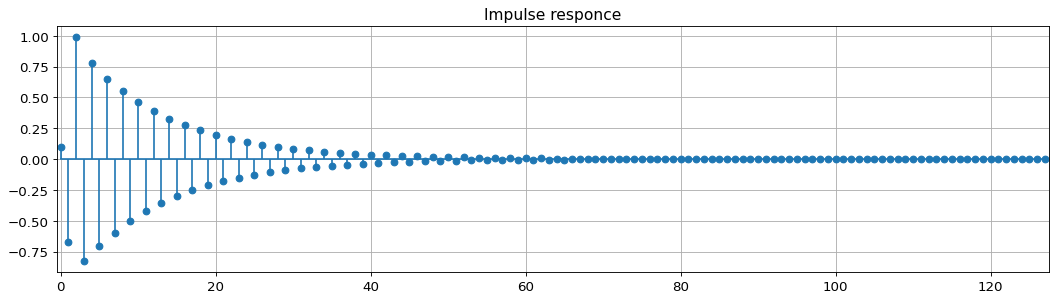

In [7]:
N = 128
# Delta-function
x = np.zeros(N)
x[0] = 1

# Input signal:
# h(z) = [b0 + b1*z^(-1) + b2*z^(-2)] / a0 + a1*z^(-1) + a2*z^(-2)
b = [0.1, -0.6, 0.5]
a = [1, 0.7, -0.2]

y1 = lfilter(b, a, x)

plt.figure(figsize=(16, 4), dpi=80)
plt.title('Impulse responce')
plt.stem(y1, use_line_collection=True, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.grid(True)

Jika filter stabil, sampel y(n) berkurang nilainya seiring waktu.

Seperti yang dapat dilihat pada grafik sebelumnya - filter BIR yang dihitung stabil.

Filter NIR (SCIPY / MATLAB)
Di bawah ini adalah daftar fungsi filter NIR dasar untuk implementasi dalam python menggunakan paket sinyal - scipy.signal. Sebagian besar fungsi memiliki prototipe MATLAB yang serupa.

Deskripsi Fungsi :
iirdesign(wp, ws, gpass, gstop[, analog, ...]) Fungsi untuk kalkulasi filter digital secara lengkap. Mengembalikan koefisien a, b, nol dan kutub, dll.

iirfilter(N, Wn[, rp, rs, btype, analog, ...]) Implementasi filter BIR dari tipe dan orde N yang dipilih. Mengembalikan koefisien a, b, nol dan kutub, dll.

butter(N, Wn[, btype, analog, output, fs]) Filter Butterworth. Menerapkan filter orde-N dan mengembalikan koefisien filter.

buttord(wp, ws, gpass, gstop[, analog, fs]) Mengembalikan orde minimum yang diperlukan untuk mengimplementasikan filter

cheby1(N, rp, Wn[, btype, analog, output, fs]) Filter tipe 1 Chebyshev. Mengimplementasikan filter orde-N dan mengembalikan koefisien filter.

cheb1ord(wp, ws, gpass, gstop[, analog, fs]) Mengembalikan orde minimum yang diperlukan untuk mengimplementasikan filter

cheby2(N, rs, Wn[, btype, analog, output, fs]) Filter Chebyshev tipe 2. Mengimplementasikan filter orde-N dan mengembalikan koefisien filter.

cheb2ord(wp, ws, gpass, gstop[, analog, fs]) Mengembalikan orde minimum yang diperlukan untuk mengimplementasikan filter

ellip(N, rp, rs, Wn[, btype, analog, output, fs]) Filter BIR elips (Kauer)

ellipord(wp, ws, gpass, gstop[, analog, fs]) Mengembalikan orde minimum yang diperlukan untuk mengimplementasikan filter dari nilai argumen masukan

bessel(N, Wn[, btype, analog, output, norm, fs]) Filter BIH Bessel.

iirnotch(w0, Q[, fs]) Filter penutup. Mengembalikan koefisien a, b. Argumen masukan adalah frekuensi sinyal, faktor kualitas dan frekuensi cutoff

iirpeak(w0, Q[, fs]) Filter bandpass. Fungsi ini mengembalikan koefisien a, b dari filter orde dua. Argumen masukan - frekuensi sinyal, faktor kualitas dan frekuensi cut-off.

Filter Butterworth
Contoh penerapan filter Butterworth orde 3. Mari kita tunjukkan bagaimana sinyal bising melewati filter tersebut:

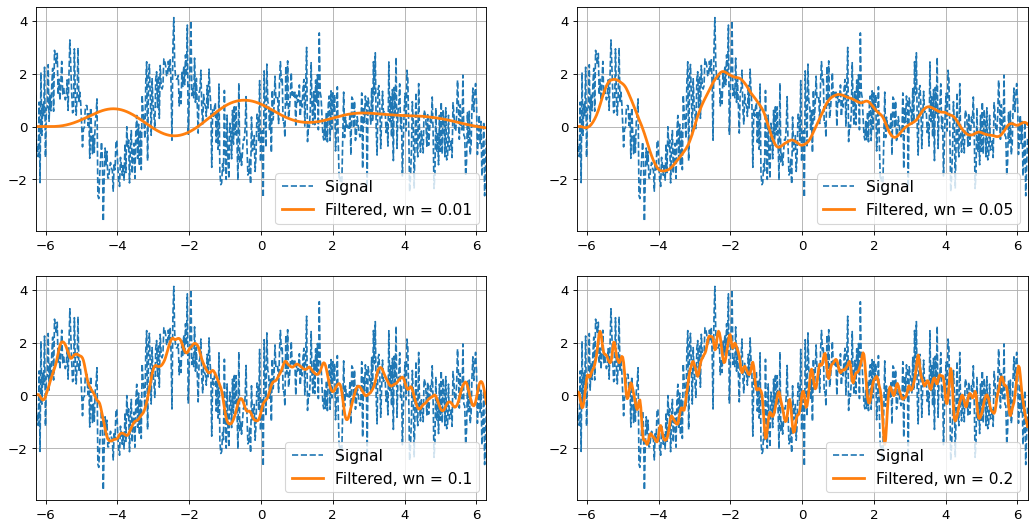

In [8]:
# Create input signal
t = 2 * np.pi * np.linspace(-1, 1, 500)
x = np.sin(0.25*t*t)+ 0.95*np.sin(2.0*t)

# Add some white noise
np.random.seed(1)
xn = x + np.random.randn(len(t))

# 3-order lowpass butterworth filter
b, a = butter(3, 0.2)
z = lfilter(b, a, xn)

wn = [0.01, 0.05, 0.1, 0.2]

# Calculate IIR filter
zz = np.zeros((t.size, 4))
for i in range(4):
    b, a = butter(3, wn[i])
    zz[:, i] = lfilter(b, a, xn)
    
# Plot results
plt.figure(figsize=(16, 8), dpi=80)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(t, xn, 'C0--', linewidth=1.5)
    plt.plot(t, zz[:,i], 'C1', linewidth=2.5)
    plt.xlim([-2 * np.pi, 2 * np.pi])
    plt.grid(True)
    plt.legend(('Signal', 'Filtered, wn = {}'.format(wn[i])), loc='lower right')